In [1]:
from bs4 import BeautifulSoup
import re
import requests

In [2]:
# 获得站点
url = 'https://dt.8684.cn/bj'
response = requests.get(url)
response.encoding = 'utf-8'
soup_content = BeautifulSoup(response.text, features = 'lxml')
soup_content

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml"> <head> <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <meta content="no-transform " http-equiv="Cache-Control"/> <meta content="no-siteapp" http-equiv="Cache-Control"/> <meta content="pc" name="applicable-device"/> <title>北京地铁_北京地铁线路图_北京地铁票价查询_北京地铁运营时间</title> <meta content="北京地铁线路图最新,北京地铁票价查询,北京地铁官网,北京地铁票价,北京地铁涨价,北京地铁票价调整,北京地铁票价图,北京地铁换乘,北京地铁换乘查询,北京地铁换乘图" name="Description"/> <link href="https://css.8684.cn/dt/base.min.css" rel="stylesheet" type="text/css"/> <link href="https://css.8684.cn/dt/page.min.css" rel="stylesheet" type="text/css"/> <script type="text/javascript">var m_url=''; var ecity='beijing';var str_l='1号线 2号线外环 2号线内环 4号线 5号线 6号线 7号线 8号线南 8号线北 9号线 10号线内环 10号线外环 13号线 14号线东段 14号线（西段） 15号线 16号线 S1号线 S2号线 八通线 昌平线 房山线 机场线 西郊线 燕房线 亦庄线';var home_url='https://dt.8684.cn/bj';</script> <script src=

In [3]:
def get_metro_map(soup_content):
    metro_map = {}
    for link in soup_content.find_all(class_ = 'sLink'):
        temp = link.text.split()
        if '未开通' in temp[0] or 'S2' in temp[0]:
            continue
        if '外环' in temp[0]:
            temp[0] = temp[0].split('线')[0] + '线'
        metro_map[temp[0]] = temp[1:]
    return metro_map

In [4]:
metro_map = get_metro_map(soup_content)
metro_map

{'北京地铁1号线': ['苹果园',
  '古城',
  '八角游乐园',
  '八宝山',
  '玉泉路',
  '五棵松',
  '万寿路',
  '公主坟',
  '军事博物馆',
  '木樨地',
  '南礼士路',
  '复兴门',
  '西单',
  '天安门西',
  '天安门东',
  '王府井',
  '东单',
  '建国门',
  '永安里',
  '国贸',
  '大望路',
  '四惠',
  '四惠东'],
 '北京地铁2号线': ['西直门',
  '车公庄',
  '阜成门',
  '复兴门',
  '长椿街',
  '宣武门',
  '和平门',
  '前门',
  '崇文门',
  '北京站',
  '建国门',
  '朝阳门',
  '东四十条',
  '东直门',
  '雍和宫',
  '安定门',
  '鼓楼大街',
  '积水潭'],
 '北京地铁4号线': ['安河桥北',
  '北宫门',
  '西苑',
  '圆明园',
  '北京大学东门',
  '中关村',
  '海淀黄庄',
  '人民大学',
  '魏公村',
  '国家图书馆',
  '动物园',
  '西直门',
  '新街口',
  '平安里',
  '西四',
  '灵境胡同',
  '西单',
  '宣武门',
  '菜市口',
  '陶然亭',
  '北京南站',
  '马家堡',
  '角门西',
  '公益西桥',
  '新宫',
  '西红门',
  '高米店北',
  '高米店南',
  '枣园',
  '清源路',
  '黄村西大街',
  '黄村火车站',
  '义和庄',
  '生物医药基地',
  '天宫院'],
 '北京地铁5号线': ['宋家庄',
  '刘家窑',
  '蒲黄榆',
  '天坛东门',
  '磁器口',
  '崇文门',
  '东单',
  '灯市口',
  '东四',
  '张自忠路',
  '北新桥',
  '雍和宫',
  '和平里北街',
  '和平西桥',
  '惠新西街南口',
  '惠新西街北口',
  '大屯路东',
  '北苑路北',
  '立水桥南',
  '立水桥',
  '天通苑南',
  '天通苑',
  '天通苑北'],
 '北京地铁6号线': ['金安桥',
  '苹果园',


In [5]:
import re
import requests

In [6]:
url_site = 'http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json'

In [7]:
response = requests.get(url_site)
html_text = response.text
html_text

'{"s":"北京市地铁","o":"1015,660","l":[{"f":[{"li":"900000069871","c":["270 681","243 681","226 681","203 681","180 681","160 681","155 682","152 687","152 696","152 705","152 711","152 724","153 735","153 744","153 753","152 754","150 755","131 755","121 755","104 755"]},{"li":"900000069872","c":["104 760","121 760","131 760","151 760","156 759","158 754","158 744","158 735","158 724","158 711","158 705","158 696","158 688","159 687","161 687","180 687","203 687","226 687","243 687","270 687"]}],"lo":"0","li":"900000069871|900000069872","ln":"S1线","ls":"900000069871","c":["104 758","121 758","131 758","151 758","154 756","155 754","155 744","155 735","155 724","155 711","155 705","155 696","155 687","157 685","161 684","180 684","181 684","203 684","226 684","243 684","270 684"],"cl":"B35A1F","lp":["177 635"],"su":"1","la":"","st":[{"sl":"116.163167,39.923620","sid":"110100023339035","sp":"jin an qiao","udsi":"900000069872015;900000069871002","n":"金安桥","udpx":"270 687;270 681","si":"110100

In [8]:
station_location = {}

In [9]:
def cut(pattern, string):
    return re.findall(pattern, string)

In [10]:
{"sl":"116.212684,39.907442","sid":"110100023110004",
 "sp":"ba jiao you le yuan","udsi":"110100023110004;110100023111022",
 "n":"八角游乐园","udpx":"391 723;391 717","si":"110100023110004",
 "udsu":"1;1","poiid":"BV10013455","t":"0","r":"110100023110",
 "lg":"4","p":"391 720","udli":"110100023110;110100023111","su":"1","rs":"391 720"}

{'sl': '116.212684,39.907442',
 'sid': '110100023110004',
 'sp': 'ba jiao you le yuan',
 'udsi': '110100023110004;110100023111022',
 'n': '八角游乐园',
 'udpx': '391 723;391 717',
 'si': '110100023110004',
 'udsu': '1;1',
 'poiid': 'BV10013455',
 't': '0',
 'r': '110100023110',
 'lg': '4',
 'p': '391 720',
 'udli': '110100023110;110100023111',
 'su': '1',
 'rs': '391 720'}

In [11]:
pattern_station = re.compile(r'"sl":"(\d+.\d+),(\d+.\d+)","sid":"\d+","sp":"[\w\s]*","udsi":"\d+;\d+","n":"(\w+)"')

In [12]:
station_list = cut(pattern_station, html_text)
station_list

[('116.163167', '39.923620', '金安桥'),
 ('116.134010', '39.916030', '四道桥'),
 ('116.125809', '39.912383', '桥户营'),
 ('116.122225', '39.905138', '上岸'),
 ('116.123254', '39.895780', '栗园庄'),
 ('116.114443', '39.890465', '小园'),
 ('116.100334', '39.889378', '石厂'),
 ('116.177388', '39.926727', '苹果园'),
 ('116.190337', '39.907450', '古城'),
 ('116.212684', '39.907442', '八角游乐园'),
 ('116.235948', '39.907440', '八宝山'),
 ('116.252888', '39.907433', '玉泉路'),
 ('116.273987', '39.907456', '五棵松'),
 ('116.294765', '39.907474', '万寿路'),
 ('116.309919', '39.907469', '公主坟'),
 ('116.321459', '39.907422', '军事博物馆'),
 ('116.337583', '39.907379', '木樨地'),
 ('116.352583', '39.907234', '南礼士路'),
 ('116.356866', '39.907242', '复兴门'),
 ('116.374072', '39.907383', '西单'),
 ('116.391278', '39.907472', '天安门西'),
 ('116.401216', '39.907780', '天安门东'),
 ('116.411571', '39.908069', '王府井'),
 ('116.418480', '39.908325', '东单'),
 ('116.435806', '39.908501', '建国门'),
 ('116.450497', '39.908454', '永安里'),
 ('116.461841', '39.909104', '国贸'),
 

In [13]:
def get_lat_and_lon(address):
    for lon, lat, name in station_list:
        if name not in address: continue
        if name in address:
            return float(lon), float(lat)

In [14]:
def get_single_line_geoinfo(metro_line, stations):
    metro_geoinfo = {}
    for station in stations:
        metro_geoinfo[station] = get_lat_and_lon(metro_line + station + '地铁站')
    return metro_geoinfo

In [15]:
def get_all_line_geoinfo(metro_map):
    metro_line_geoinfo = {}
    for metro_line, stations in metro_map.items():
        line_info = get_single_line_geoinfo(metro_line, metro_map[metro_line])
        metro_line_geoinfo[metro_line] = line_info
    return metro_line_geoinfo

In [16]:
metro_all_line = get_all_line_geoinfo(metro_map)

In [17]:
metro_all_line

{'北京地铁1号线': {'苹果园': (116.177388, 39.926727),
  '古城': (116.190337, 39.90745),
  '八角游乐园': (116.212684, 39.907442),
  '八宝山': (116.235948, 39.90744),
  '玉泉路': (116.252888, 39.907433),
  '五棵松': (116.273987, 39.907456),
  '万寿路': (116.294765, 39.907474),
  '公主坟': (116.309919, 39.907469),
  '军事博物馆': (116.321459, 39.907422),
  '木樨地': (116.337583, 39.907379),
  '南礼士路': (116.352583, 39.907234),
  '复兴门': (116.356866, 39.907242),
  '西单': (116.374072, 39.907383),
  '天安门西': (116.391278, 39.907472),
  '天安门东': (116.401216, 39.90778),
  '王府井': (116.411571, 39.908069),
  '东单': (116.41848, 39.908325),
  '建国门': (116.435806, 39.908501),
  '永安里': (116.450497, 39.908454),
  '国贸': (116.461841, 39.909104),
  '大望路': (116.475783, 39.908287),
  '四惠': (116.495456, 39.908749),
  '四惠东': (116.495456, 39.908749)},
 '北京地铁2号线': {'西直门': (116.355426, 39.940474),
  '车公庄': (116.354357, 39.932397),
  '阜成门': (116.356009, 39.923686),
  '复兴门': (116.356866, 39.907242),
  '长椿街': (116.363355, 39.899433),
  '宣武门': (116.374314, 39.89

In [18]:
for lat, lon, name in station_list:
    if name not in station_location and lat and lon:
        station_location[name] = float(lat), float(lon)
print(station_location)

{'金安桥': (116.163167, 39.92362), '四道桥': (116.13401, 39.91603), '桥户营': (116.125809, 39.912383), '上岸': (116.122225, 39.905138), '栗园庄': (116.123254, 39.89578), '小园': (116.114443, 39.890465), '石厂': (116.100334, 39.889378), '苹果园': (116.177388, 39.926727), '古城': (116.190337, 39.90745), '八角游乐园': (116.212684, 39.907442), '八宝山': (116.235948, 39.90744), '玉泉路': (116.252888, 39.907433), '五棵松': (116.273987, 39.907456), '万寿路': (116.294765, 39.907474), '公主坟': (116.309919, 39.907469), '军事博物馆': (116.321459, 39.907422), '木樨地': (116.337583, 39.907379), '南礼士路': (116.352583, 39.907234), '复兴门': (116.356866, 39.907242), '西单': (116.374072, 39.907383), '天安门西': (116.391278, 39.907472), '天安门东': (116.401216, 39.90778), '王府井': (116.411571, 39.908069), '东单': (116.41848, 39.908325), '建国门': (116.435806, 39.908501), '永安里': (116.450497, 39.908454), '国贸': (116.461841, 39.909104), '大望路': (116.475783, 39.908287), '四惠': (116.495456, 39.908749), '四惠东': (116.515664, 39.908495), '鼓楼大街': (116.393776, 39.948972), '安定门': (116.408

In [19]:
metro_count = get_metro_map(soup_content)
for c in metro_count:
    for b in metro_count[c]:
        if b not in station_location:
            print(c, b)
print('end')

北京地铁2号线 积水潭
北京地铁10号线 车道沟
北京地铁10号线 丰台
end


In [20]:
station_location

{'金安桥': (116.163167, 39.92362),
 '四道桥': (116.13401, 39.91603),
 '桥户营': (116.125809, 39.912383),
 '上岸': (116.122225, 39.905138),
 '栗园庄': (116.123254, 39.89578),
 '小园': (116.114443, 39.890465),
 '石厂': (116.100334, 39.889378),
 '苹果园': (116.177388, 39.926727),
 '古城': (116.190337, 39.90745),
 '八角游乐园': (116.212684, 39.907442),
 '八宝山': (116.235948, 39.90744),
 '玉泉路': (116.252888, 39.907433),
 '五棵松': (116.273987, 39.907456),
 '万寿路': (116.294765, 39.907474),
 '公主坟': (116.309919, 39.907469),
 '军事博物馆': (116.321459, 39.907422),
 '木樨地': (116.337583, 39.907379),
 '南礼士路': (116.352583, 39.907234),
 '复兴门': (116.356866, 39.907242),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.391278, 39.907472),
 '天安门东': (116.401216, 39.90778),
 '王府井': (116.411571, 39.908069),
 '东单': (116.41848, 39.908325),
 '建国门': (116.435806, 39.908501),
 '永安里': (116.450497, 39.908454),
 '国贸': (116.461841, 39.909104),
 '大望路': (116.475783, 39.908287),
 '四惠': (116.495456, 39.908749),
 '四惠东': (116.515664, 39.908495),
 '鼓楼大街': (116.39377

In [21]:
import math

In [22]:
def get_lat_lon(location):
    for citys in station_location:
        if citys == location:
            return station_location[citys]

In [23]:
get_lat_lon('公主坟')

(116.309919, 39.907469)

In [24]:
def geo_distance(origin, destination):
    lat1, lon1 = get_lat_lon(origin)
    lat2, lon2 = get_lat_lon(destination)
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [25]:
def get_station_distance(station1, station2):
    return geo_distance(station_location[station1], station_location[station2])

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
station_graph = nx.Graph()

In [28]:
station_graph.add_nodes_from(list(station_location.keys()))

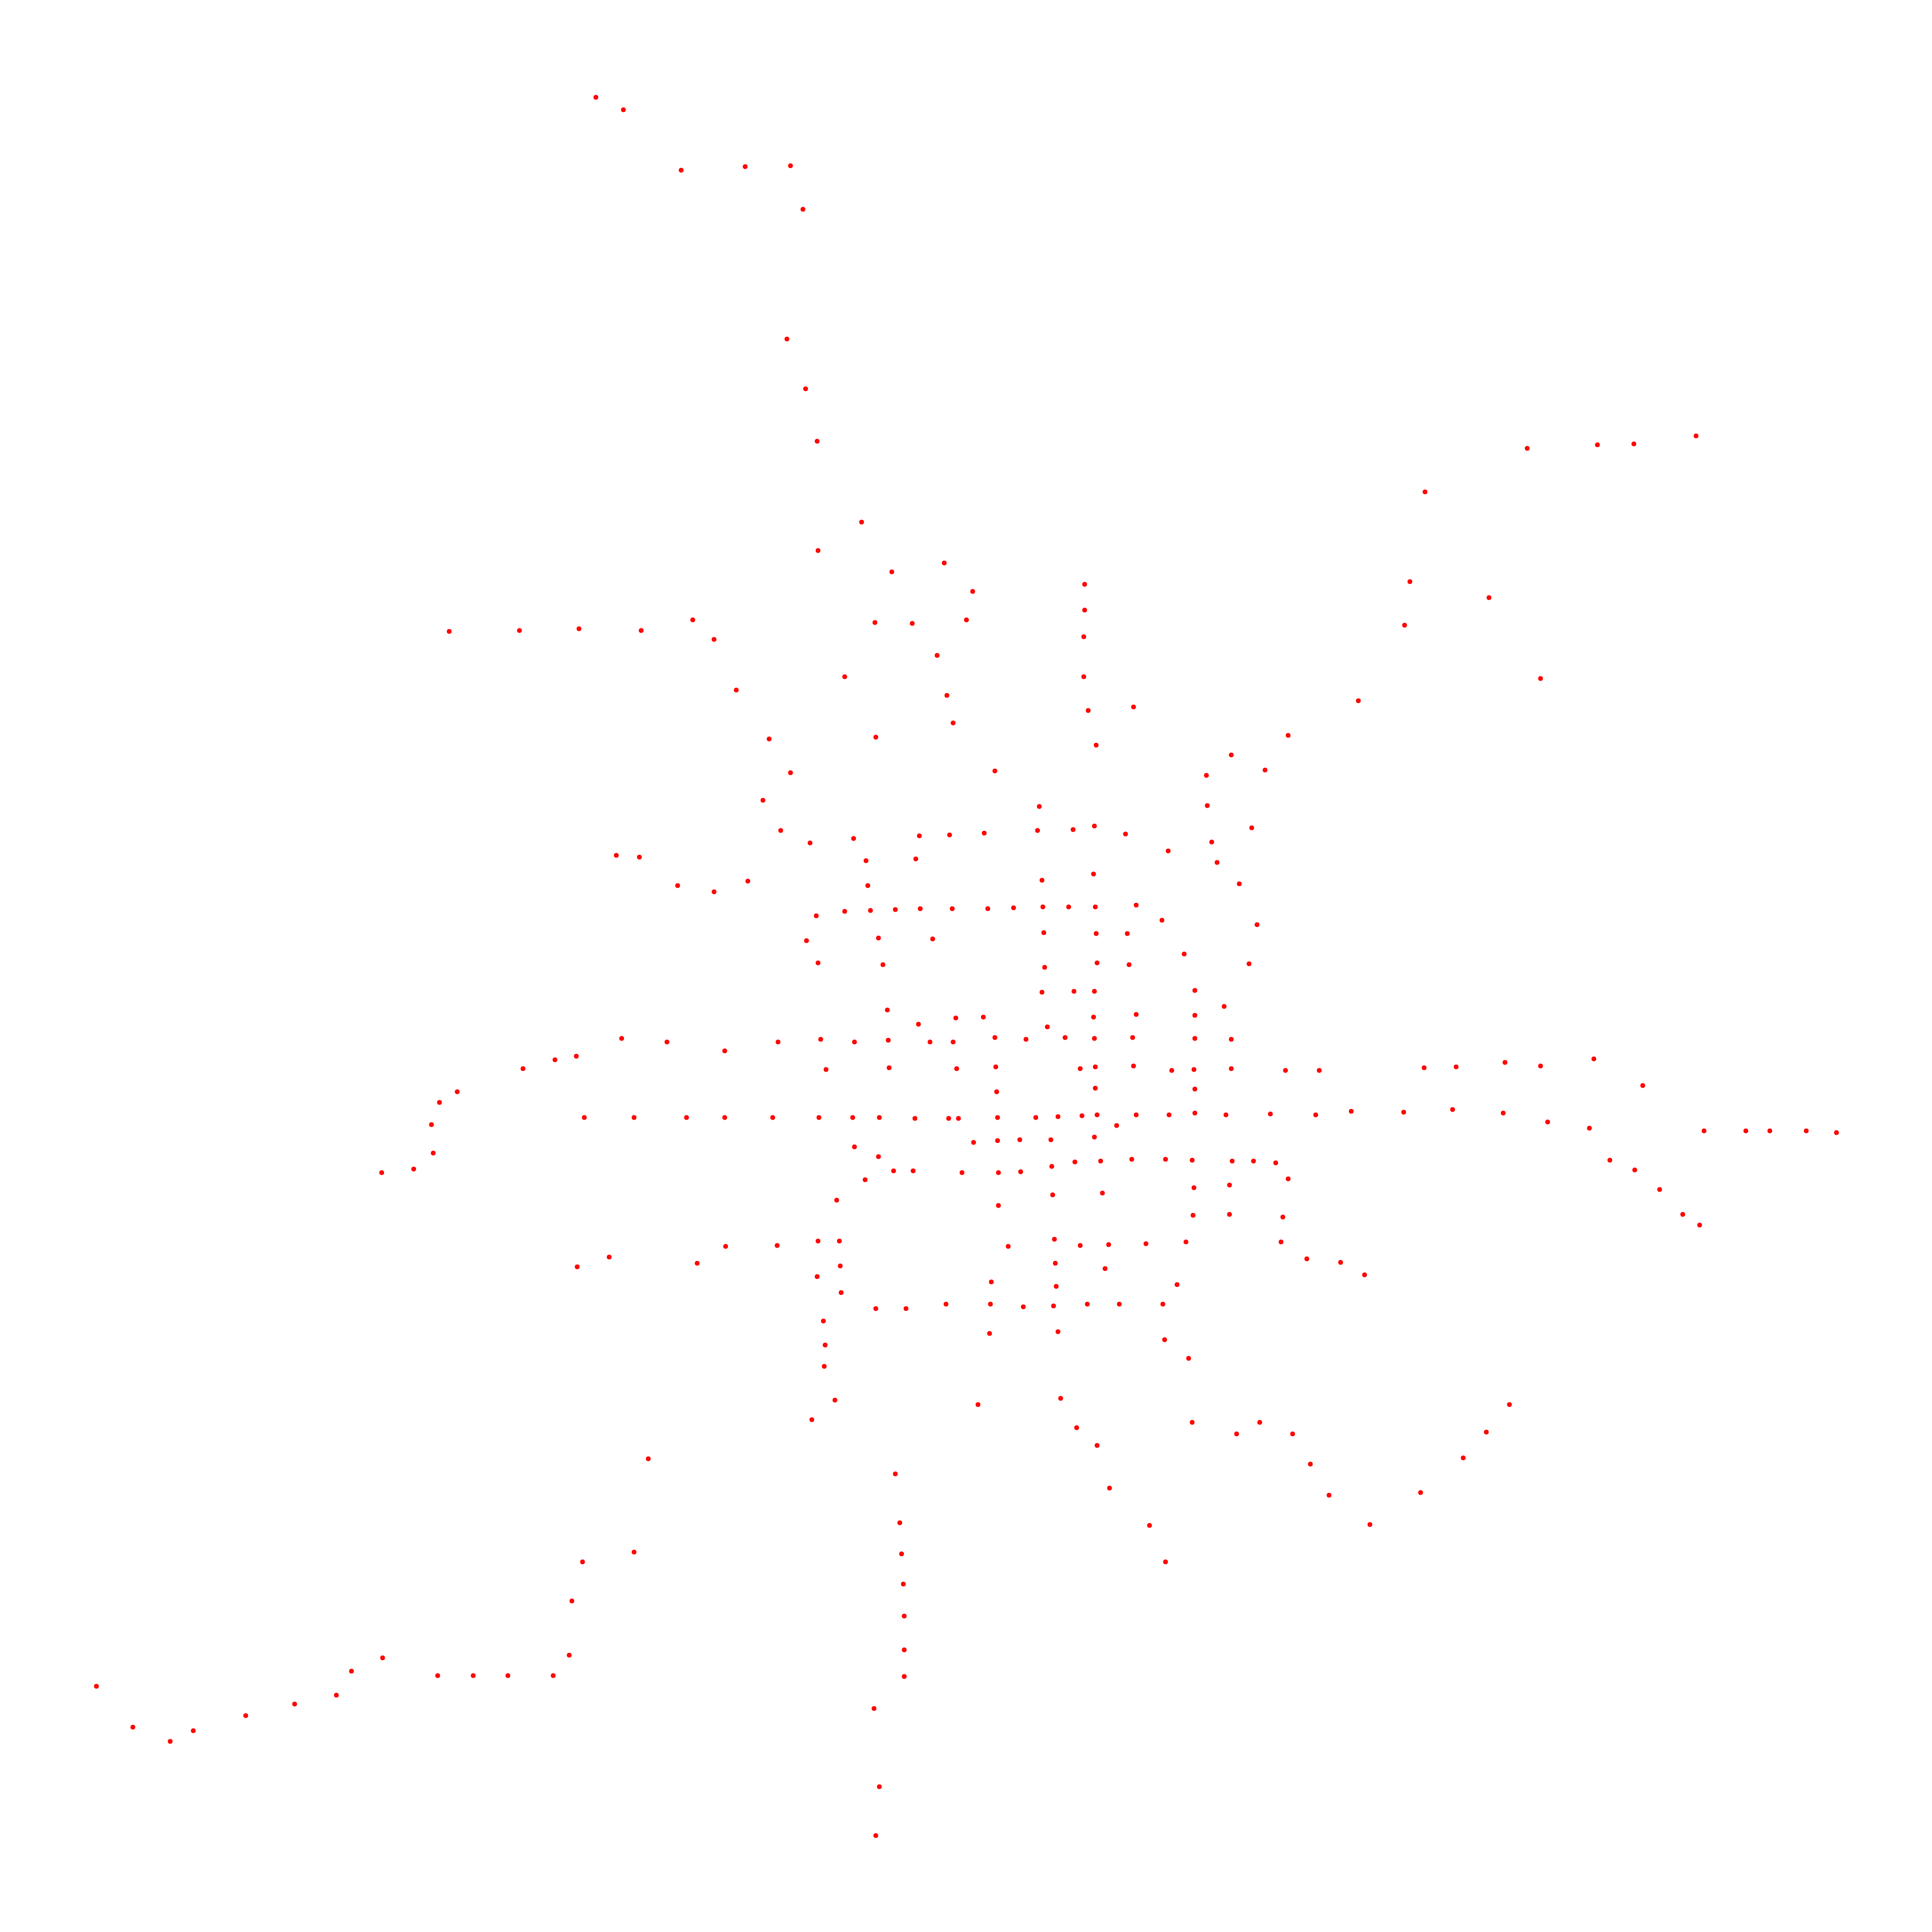

In [29]:
plt.figure(figsize = (30, 30))
nx.draw(station_graph, station_location, node_size = 20, node_color = 'red')

In [30]:
from collections import defaultdict

In [31]:
stations_connection = defaultdict(list)
stations_connection

defaultdict(list, {})

In [32]:
exc_stations = {'丰台','积水潭'}
for line in metro_map.keys():
    #print(line)
    for i,station in enumerate(metro_map[line][:-1]):
        #print(station)
        if station == metro_map[line][i+1]: continue
        if station in exc_stations: continue
            
        if metro_map[line][i+1] not in stations_connection[station]:
            stations_connection[station].append(metro_map[line][i+1])
        if station not in stations_connection[metro_map[line][i+1]]:
            stations_connection[metro_map[line][i+1]].append(station)
        if station == '苏庄': 
            stations_connection[station].append('阎村东')

In [33]:
stations_connection

defaultdict(list,
            {'苹果园': ['古城', '金安桥', '杨庄'],
             '古城': ['苹果园', '八角游乐园'],
             '八角游乐园': ['古城', '八宝山'],
             '八宝山': ['八角游乐园', '玉泉路'],
             '玉泉路': ['八宝山', '五棵松'],
             '五棵松': ['玉泉路', '万寿路'],
             '万寿路': ['五棵松', '公主坟'],
             '公主坟': ['万寿路', '军事博物馆', '西钓鱼台', '莲花桥'],
             '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
             '木樨地': ['军事博物馆', '南礼士路'],
             '南礼士路': ['木樨地', '复兴门'],
             '复兴门': ['南礼士路', '西单', '阜成门', '长椿街'],
             '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
             '天安门西': ['西单', '天安门东'],
             '天安门东': ['天安门西', '王府井'],
             '王府井': ['天安门东', '东单'],
             '东单': ['王府井', '建国门', '崇文门', '灯市口'],
             '建国门': ['东单', '永安里', '北京站', '朝阳门'],
             '永安里': ['建国门', '国贸'],
             '国贸': ['永安里', '大望路', '双井', '金台夕照'],
             '大望路': ['国贸', '四惠', '九龙山', '金台路'],
             '四惠': ['大望路', '四惠东'],
             '四惠东': ['四惠', '高碑店'],
             '西直门': ['车公庄',

In [34]:
stations_graph_connection = nx.Graph(stations_connection)

In [35]:
stations_graph_connection.edges()

EdgeView([('苹果园', '古城'), ('苹果园', '金安桥'), ('苹果园', '杨庄'), ('古城', '八角游乐园'), ('八角游乐园', '八宝山'), ('八宝山', '玉泉路'), ('玉泉路', '五棵松'), ('五棵松', '万寿路'), ('万寿路', '公主坟'), ('公主坟', '军事博物馆'), ('公主坟', '西钓鱼台'), ('公主坟', '莲花桥'), ('军事博物馆', '木樨地'), ('军事博物馆', '北京西站'), ('军事博物馆', '白堆子'), ('木樨地', '南礼士路'), ('南礼士路', '复兴门'), ('复兴门', '西单'), ('复兴门', '阜成门'), ('复兴门', '长椿街'), ('西单', '天安门西'), ('西单', '灵境胡同'), ('西单', '宣武门'), ('天安门西', '天安门东'), ('天安门东', '王府井'), ('王府井', '东单'), ('东单', '建国门'), ('东单', '崇文门'), ('东单', '灯市口'), ('建国门', '永安里'), ('建国门', '北京站'), ('建国门', '朝阳门'), ('永安里', '国贸'), ('国贸', '大望路'), ('国贸', '双井'), ('国贸', '金台夕照'), ('大望路', '四惠'), ('大望路', '九龙山'), ('大望路', '金台路'), ('四惠', '四惠东'), ('四惠东', '高碑店'), ('西直门', '车公庄'), ('西直门', '动物园'), ('西直门', '新街口'), ('西直门', '大钟寺'), ('车公庄', '阜成门'), ('车公庄', '车公庄西'), ('车公庄', '平安里'), ('长椿街', '宣武门'), ('宣武门', '和平门'), ('宣武门', '菜市口'), ('和平门', '前门'), ('前门', '崇文门'), ('崇文门', '北京站'), ('崇文门', '磁器口'), ('朝阳门', '东四十条'), ('朝阳门', '东四'), ('朝阳门', '东大桥'), ('东四十条', '东直门'), ('东直门', '雍和宫'), ('东直门', '柳芳'), ('东直门', '三元

In [36]:
plt.figure(figsize=(20, 20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [37]:
station_location['积水潭'] = (116.379185,39.954765)
station_location['车道沟'] = (116.30724,39.951215)
station_location['丰台'] = (116.296758,39.840414)

C:\Users\zhuxiang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


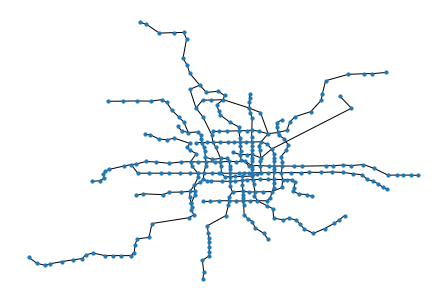

In [38]:
nx.draw(stations_graph_connection,station_location,node_size = 10)

In [39]:
import matplotlib.font_manager
plt.rcParams['font.sans-serif'] = ['SimHei']

C:\Users\zhuxiang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


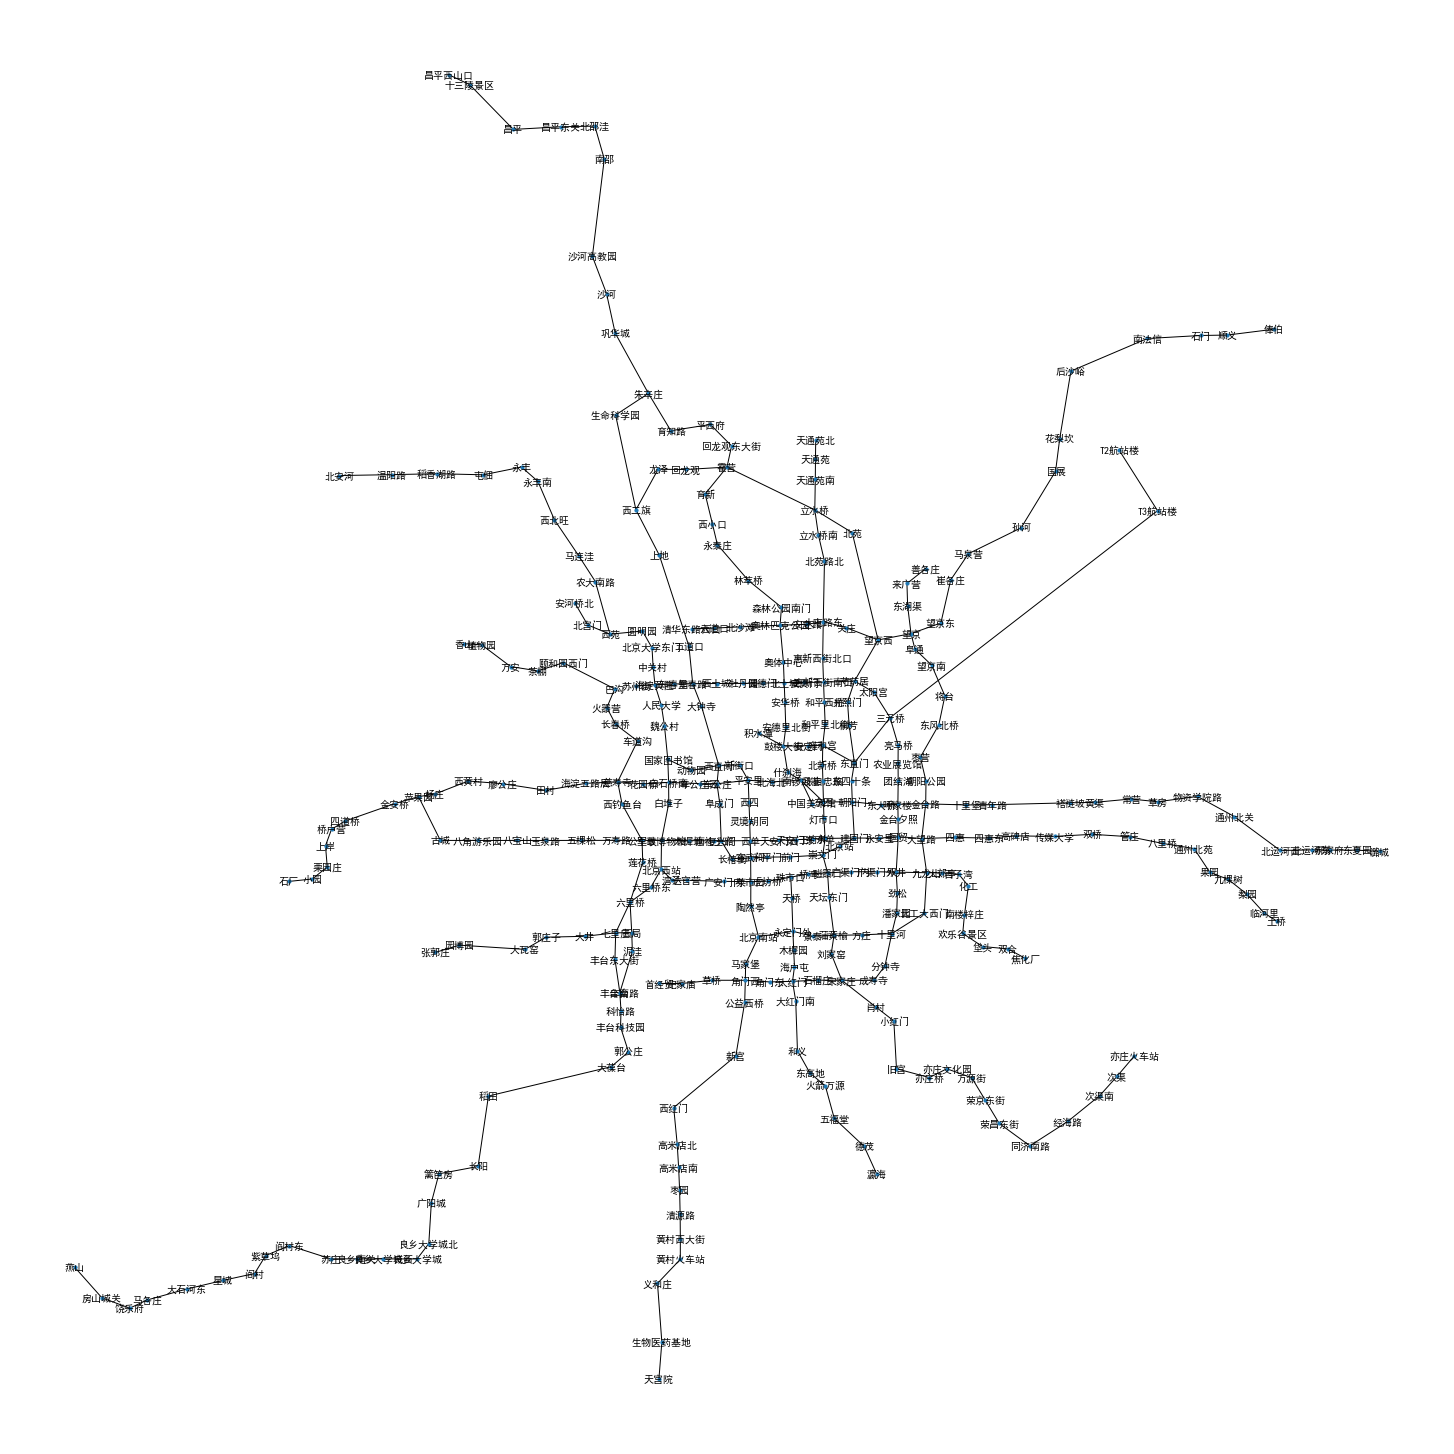

In [40]:
plt.figure(figsize =(20, 20))
nx.draw(stations_graph_connection, station_location, with_labels = True, node_size = 10, font_size = 10)

In [41]:
def least_station_first(pathes:list):
    return sorted(pathes, key = len)

In [42]:
def much_station_first(pathes:list):
    return sorted(pathes, key = len, reverse = True)

In [43]:
def least_distance_first(pathes):
    if len(pathes) <= 1: return pathes
    
    def get_path_distance(path):
        distance = 0
        for i in range(1, len(path)):
            distance += geo_distance(path[i-1], path[i])
        return distance
    return sorted(pathes, key = get_path_distance)

In [50]:
# 该搜索算法，不是最优
def search(start, destination, stations_connection, sort_condidate):
    pathes = [[start]]
    visitied = set()
    
    while pathes:
        path = pathes.pop()
        froninter = path[-1]
        
        if froninter in visitied: continue
        
        successors = stations_connection[froninter]
        
        for city in successors:
            if city in path:continue
            new_path = path + [city]
            pathes.append(new_path)
                
                
            if city == destination:
                return '>>'.join(new_path)
            visitied.add(froninter)
            
            pathes = sort_condidate(pathes)

In [51]:
search('慈寿寺', '广渠门外', stations_connection, least_distance_first)

'慈寿寺>>海淀五路居>>田村>>廖公庄>>西黄村>>杨庄>>苹果园>>古城>>八角游乐园>>八宝山>>玉泉路>>五棵松>>万寿路>>公主坟>>军事博物馆>>木樨地>>南礼士路>>复兴门>>西单>>天安门西>>天安门东>>王府井>>东单>>建国门>>永安里>>国贸>>大望路>>九龙山>>广渠门外'

In [52]:
search('慈寿寺', '广渠门外', stations_connection, least_station_first)

'慈寿寺>>西钓鱼台>>公主坟>>莲花桥>>六里桥>>六里桥东>>北京西站>>军事博物馆>>白堆子>>白石桥南>>国家图书馆>>动物园>>西直门>>大钟寺>>知春路>>五道口>>上地>>西二旗>>生命科学园>>朱辛庄>>育知路>>平西府>>回龙观东大街>>霍营>>立水桥>>北苑>>望京西>>关庄>>大屯路东>>安立路>>奥林匹克公园>>奥体中心>>北土城>>安贞门>>惠新西街南口>>芍药居>>光熙门>>柳芳>>东直门>>三元桥>>亮马桥>>农业展览馆>>团结湖>>呼家楼>>金台夕照>>国贸>>双井>>劲松>>潘家园>>十里河>>北工大西门>>九龙山>>广渠门外'

In [53]:
search('慈寿寺', '广渠门外', stations_connection,much_station_first)

'慈寿寺>>花园桥>>白石桥南>>车公庄西>>车公庄>>平安里>>北海北>>南锣鼓巷>>东四>>灯市口>>东单>>崇文门>>磁器口>>广渠门内>>广渠门外'

In [54]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key = len, reverse = True)

In [69]:
def chechIsSameLine(start, end):
    for k, v in enumerate(metro_map):
        if metro_map[v].count(start) == 1 and metro_map[v].count(end) == 1:
            return v
    return None

In [73]:
def transfer_station_much(pathes):
    if len(pathes) <= 1:
        return pathes
    
    def get_transfer(path):
        line = []
        for k, v in enumerate(path[0:-2]):
            temp = chechIsSameLine(v, path[k+1])
            if line.count(temp):
                continue
            else:
                line.append(temp)
                
        return len(line)
    return sorted(pathes, key = get_transfer)

In [71]:
search('慈寿寺', '广渠门外', stations_connection,transfer_as_much_possible)

'慈寿寺>>花园桥>>白石桥南>>车公庄西>>车公庄>>平安里>>北海北>>南锣鼓巷>>东四>>灯市口>>东单>>崇文门>>磁器口>>广渠门内>>广渠门外'

In [74]:
search('慈寿寺', '广渠门外', stations_connection,transfer_station_much)

'慈寿寺>>西钓鱼台>>公主坟>>莲花桥>>六里桥>>六里桥东>>北京西站>>军事博物馆>>白堆子>>白石桥南>>国家图书馆>>动物园>>西直门>>大钟寺>>知春路>>五道口>>上地>>西二旗>>生命科学园>>朱辛庄>>育知路>>平西府>>回龙观东大街>>霍营>>立水桥>>北苑>>望京西>>关庄>>大屯路东>>安立路>>奥林匹克公园>>奥体中心>>北土城>>安贞门>>惠新西街南口>>芍药居>>光熙门>>柳芳>>东直门>>三元桥>>亮马桥>>农业展览馆>>团结湖>>呼家楼>>金台夕照>>国贸>>双井>>劲松>>潘家园>>十里河>>北工大西门>>九龙山>>广渠门外'